In [115]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import os
from scipy.stats import linregress

In [116]:
#Import crime data
crime_file = pd.read_csv('Resources/crime_and_incarceration_by_state.csv')
crime_df = pd.DataFrame(crime_file)
#crime_df['jurisdiction'] = crime_df['jurisdiction'].str.title()
#calculate 'total crimes' column
crime_df['Total Crime'] = crime_df['violent_crime_total'] + crime_df['property_crime_total']
#Reorganize columns and remove unnecessary columns
crime_df = crime_df[['jurisdiction','year','includes_jails','prisoner_count','crime_reporting_change','crimes_estimated','Total Crime']]
#rename columns
crime_df = crime_df.rename(columns = {'jurisdiction' : 'State',
                                      'year' : 'year',
                                      'includes_jails' : 'Includes Jails' ,
                                      'prisoner_count' : 'Prisoner Count',
                                      'crime_reporting_change' : 'Crime Reporting Change',
                                      'crimes_estimated' : 'Crime Estimated'})
#proper state
crime_df['State'] = crime_df['State'].str.title()
crime_df.head()



,State,year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime
0,Federal,2001,False,149852,NaN,NaN,NaN
1,Alabama,2001,False,24741,False,False,192835.0
2,Alaska,2001,True,4570,False,False,26895.0
3,Arizona,2001,False,27710,False,False,322549.0
4,Arkansas,2001,False,11489,False,False,111296.0


In [117]:
#Import education data
#edu_file = pd.read_csv('Resources/edu_data.csv')
#edu_df = pd.DataFrame(edu_file)


In [118]:
#Import income/Poverty data (census)
inc_file = pd.read_csv('Resources/pov_data.csv')
inc_df = pd.DataFrame(inc_file)
inc_df.head()


,State,year,Poverty Variable,Labor Variable
0,Alaska,2009,64038,683142
1,Alabama,2009,757833,4633360
2,Arkansas,2009,488788,2838143
3,Arizona,2009,914040,6324865
4,California,2009,4694423,36308527


In [119]:
#Octavia's Topic
#x_file = pd.read_csv('Resources/x_data.csv')
#x_df = pd.DataFrame(x_file)

In [120]:
#Merge dataframes on state and year...
crime_inc = pd.merge(crime_df,inc_df, on=['State','year'])
crime_inc.head()

,State,year,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime,Poverty Variable,Labor Variable
0,Alabama,2009,False,27241,False,False,199201.0,757833,4633360
1,Alaska,2009,True,5472,False,False,24962.0,64038,683142
2,Arizona,2009,False,40544,False,False,264849.0,914040,6324865
3,Arkansas,2009,False,13338,False,False,123983.0,488788,2838143
4,California,2009,False,168830,False,False,1184367.0,4694423,36308527


In [121]:
#Sadia Topic 


In [122]:
poverty=pd.read_csv("Resources/newpov_data.csv")

In [123]:
merge_file=pd.merge(poverty,crime_inc)

In [124]:
merge_file.head()

,State,year,Poverty,Population,Includes Jails,Prisoner Count,Crime Reporting Change,Crime Estimated,Total Crime,Poverty Variable,Labor Variable
0,Alaska,2009,1137,683142,True,5472,False,False,24962.0,64038,683142
1,Alabama,2009,14235,4633360,False,27241,False,False,199201.0,757833,4633360
2,Arkansas,2009,13179,2838143,False,13338,False,False,123983.0,488788,2838143
3,Arizona,2009,10486,6324865,False,40544,False,False,264849.0,914040,6324865
4,California,2009,34197,36308527,False,168830,False,False,1184367.0,4694423,36308527


In [125]:
#bar graph of poverty variable,labor variable,violent crime total 

In [126]:
by_year_df=pd.DataFrame(merge_file.groupby(['year']).sum()['Total Crime'])

In [127]:
by_year_df.head()

,Total Crime
year,
2009,10626372.0
2010,10327045.0
2011,10221687.0
2012,10180436.0
2013,9810933.0


[]

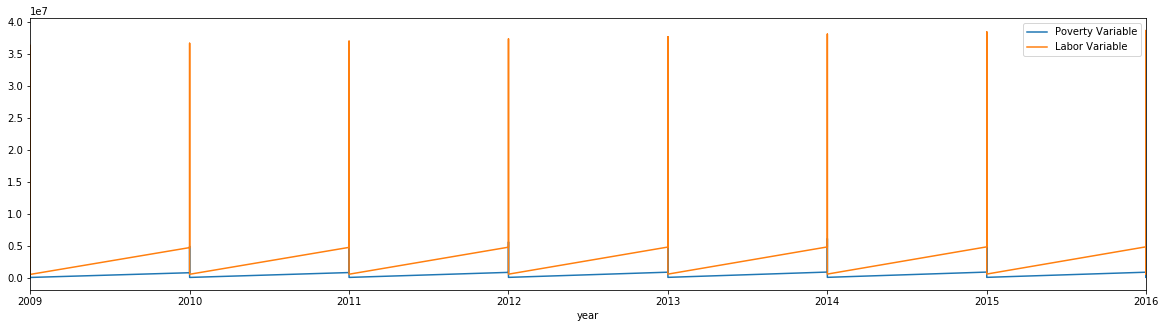

In [128]:
#creating a line plot to show the relationship between poverty, employment, and violent crimes.
ax=plt.gca()
pov_pic= merge_file.plot(kind='line',x='year',y='Poverty Variable',ax=ax)
pov_pic.figure.savefig('povline.png')
merge_file.plot(kind='line',x='year',y='Labor Variable',ax=ax)
fig = plt.gcf()
fig = fig.set_size_inches((20,5))
plt.plot()

In [129]:
pov_graph_info=pd.DataFrame(merge_file.groupby(['year']).sum()['Poverty Variable'])

In [130]:
labor_var_info=pd.DataFrame(merge_file.groupby(['year']).sum()['Labor Variable'])

In [131]:
bar_info=pd.merge(pov_graph_info,labor_var_info,on='year')

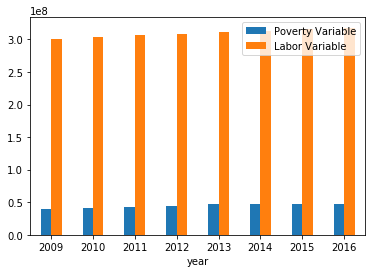

In [132]:
#poverty and labor variable yearly comparision
ax=bar_info.plot.bar(rot=0)

In [133]:
#povery and violent crime rates yearly comparison
pov_crime=pd.merge(pov_graph_info,by_year_df,on='year')

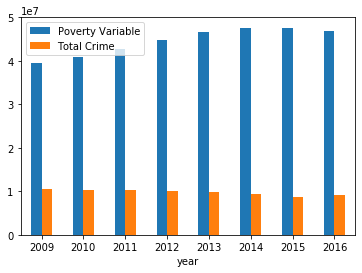

In [134]:
pov_crime_bar=pov_crime.plot.bar(rot=0)

In [135]:
lab_crime=pd.merge(labor_var_info,by_year_df,on='year')

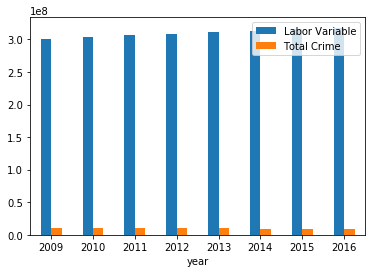

In [136]:
lab_crime_bar=lab_crime.plot.bar(rot=0)

Text(0.5, 1.0, 'Total Crime vs. Poverty')

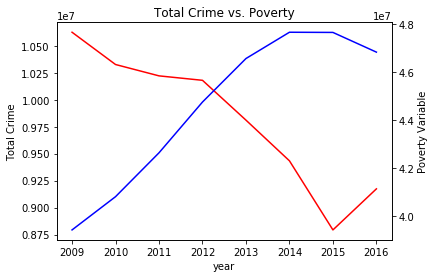

In [137]:
#creating scatter plot for a different visual option
fig, ax1 = plt.subplots()
yearlyCrime = crime_inc.groupby(['year']).sum()['Total Crime']
ax1.plot(yearlyCrime, color='r')
ax1.set_ylabel('Total Crime')
ax2 = ax1.twinx()
yearly_pov = crime_inc.groupby(['year']).sum()['Poverty Variable']
ax2.plot(yearly_pov, color='b')
ax2.set_ylabel('Poverty Variable')
ax1.set_xlabel('year')
plt.title('Total Crime vs. Poverty')

Text(0.5, 1.0, 'Total Crime vs. Labor')

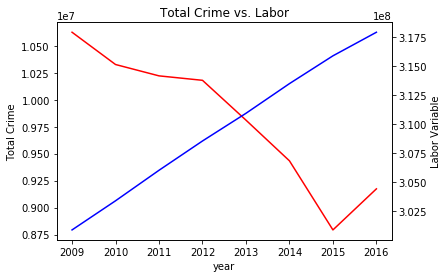

In [138]:
#creating scatter plot for a different visual option
fig, ax1 = plt.subplots()
yearlyCrime = crime_inc.groupby(['year']).sum()['Total Crime']
ax1.plot(yearlyCrime, color='r')
ax1.set_ylabel('Total Crime')
ax2 = ax1.twinx()
yearly_lab = crime_inc.groupby(['year']).sum()['Labor Variable']
ax2.plot(yearly_lab, color='b')
ax2.set_ylabel('Labor Variable')
ax1.set_xlabel('year')
plt.title('Total Crime vs. Labor')

In [156]:
race_df=pd.read_csv('Resources/race_data.csv')

In [157]:
# rename columns
#rename columns
race_df = race_df.rename(columns = {'Year' :'year',
                                      'Total Population' : 'Total Population',
                                      'White(pop)' : 'White' ,
                                      'Black(pop)' : 'Black',
                                      'Indigenous(pop)' : 'Indigenous',
                                      'Asian(pop)' : 'Asian',
                                     'Pacific Islander(pop)':'Pacific Islander'})
                                     #'Mixed Race(pop)':'Mixed Race',
                                     #'Hispanic (pop)':'Hispanic',
                                     # 'White(%)':'White(%)',
                                     #'Black(%)':'Black (%)',
                                     #'Indigenous(%)':'Indigenous(%)',
                                     #'Asian(%)':'Asian(%)','Pacific Islander(%)': 'Pacific Islander(%)','Mixed Race(%)':'Mixed Race(%)'
                                     #'Hispanic(%)':'Hispanic(%)'})

In [159]:
lab_pov_race=pd.merge(bar_info,race_df, on='year')

In [174]:
lab_pov_race.head()

,year,Poverty Variable,Labor Variable,State,Total Population,White (pop),Black (pop),Indigenous (pop),Asian (pop),Pacfic Islander (pop),Mixed Race (pop),Hispanic (pop),White (%),Black (%),Indigenous (%),Asian (%),Pacfic Islander (%),Mixed Race (%),Hispanic (%)
0,2009,39435098,300873100,Alaska,683142,467650,25161,91939,31878,4269,50632,39661,68.5,3.7,13.5,4.7,0.6,7.4,5.8
1,2009,39435098,300873100,Alabama,4633360,3256941,1209938,22969,46655,2025,56490,130220,70.3,26.1,0.5,1.0,0.0,1.2,2.8
2,2009,39435098,300873100,Arkansas,2838143,2228798,439355,19233,31120,2505,49997,153630,78.5,15.5,0.7,1.1,0.1,1.8,5.4
3,2009,39435098,300873100,Arizona,6324865,4906936,227282,284265,153301,11045,164255,1881878,77.6,3.6,4.5,2.4,0.2,2.6,29.8
4,2009,39435098,300873100,California,36308527,22258042,2249404,283031,4473292,132535,1272989,13102161,61.3,6.2,0.8,12.3,0.4,3.5,36.1


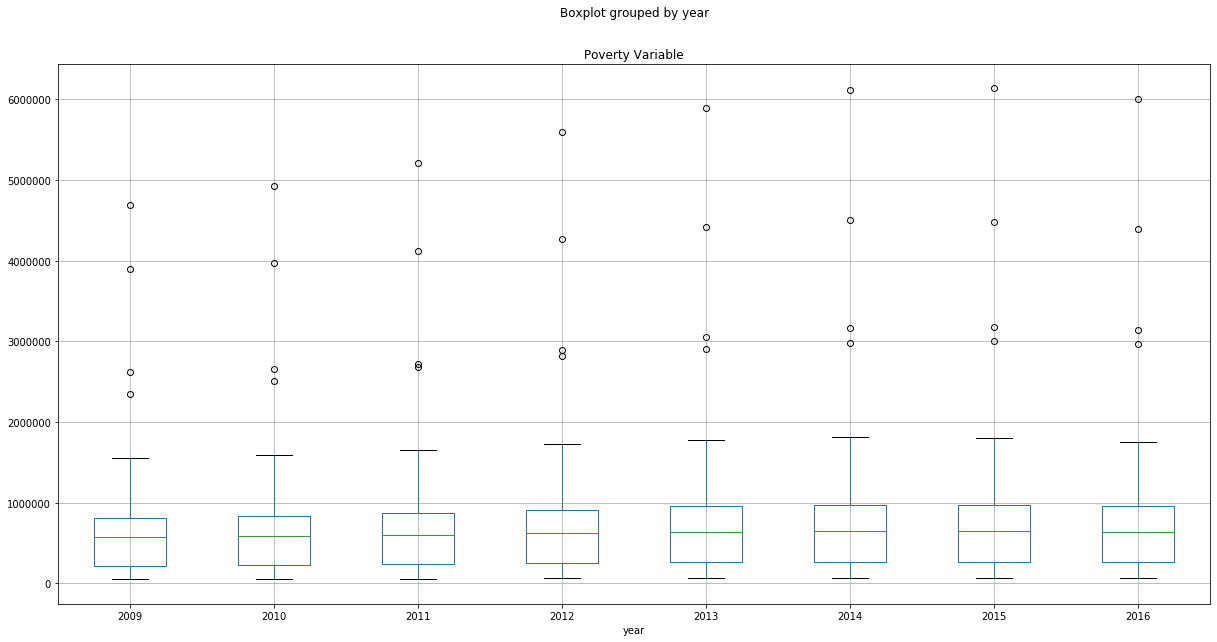

In [170]:
merge_file.boxplot("Poverty Variable",by="year",figsize=(20,10))

In [171]:
# Extract individual groups
group1 = merge_file[merge_file["year"] == 2009]["Poverty Variable"]
group2 = merge_file[merge_file["year"] == 2010]["Poverty Variable"]
group3 = merge_file[merge_file["year"] == 2011]["Poverty Variable"]
group4 = merge_file[merge_file["year"] == 2012]["Poverty Variable"]
group5=merge_file[merge_file["year"] == 2013]["Poverty Variable"]
group6=merge_file[merge_file["year"] == 2014]["Poverty Variable"]
group7=merge_file[merge_file["year"] == 2015]["Poverty Variable"]
group8=merge_file[merge_file["year"] == 2016]["Poverty Variable"]

In [172]:
import scipy.stats as stats

In [173]:
stats.f_oneway(group1, group2, group3, group4, group5,group6,group7,group8)

F_onewayResult(statistic=0.18345145641133642, pvalue=0.9886991493001138)

In [ ]:
# In this we are exploring the differences of poverty levels over the span of years in each state
#Because the years of poverty are dependent upon each other it makes sense for the pvalue found during ANOVA to be so high
#therefore, making it statistically insignificant 